In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np

In [2]:
HRdata = pd.read_csv('HRData.csv')
HRdata.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [3]:
HRdata.columns.values

array(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident',
       'left', 'promotion_last_5years', 'sales', 'salary'], dtype=object)

In [4]:
HRdata.groupby('sales').mean()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
sales,,,,,,,,
IT,0.618142,0.716830,3.816626,202.215974,3.468623,0.133659,0.222494,0.002445
RandD,0.619822,0.712122,3.853875,200.800508,3.367217,0.170267,0.153748,0.034307
accounting,0.582151,0.717718,3.825293,201.162973,3.522816,0.125163,0.265971,0.018253
hr,0.598809,0.708850,3.654939,198.684709,3.355886,0.120433,0.290934,0.020298
management,0.621349,0.724000,3.860317,201.249206,4.303175,0.163492,0.144444,0.109524
marketing,0.618601,0.715886,3.687646,199.385781,3.569930,0.160839,0.236597,0.050117
product_mng,0.619634,0.714756,3.807095,199.965632,3.475610,0.146341,0.219512,0.000000
sales,0.614447,0.709717,3.776329,200.911353,3.534058,0.141787,0.244928,0.024155
support,0.618300,0.723109,3.803948,200.758188,3.393001,0.154778,0.248991,0.008973


In [5]:
HRdata.groupby('sales',as_index=False).mean().sort_values(by='satisfaction_level')

,sales,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
2,accounting,0.582151,0.717718,3.825293,201.162973,3.522816,0.125163,0.265971,0.018253
3,hr,0.598809,0.708850,3.654939,198.684709,3.355886,0.120433,0.290934,0.020298
9,technical,0.607897,0.721099,3.877941,202.497426,3.411397,0.140074,0.256250,0.010294
7,sales,0.614447,0.709717,3.776329,200.911353,3.534058,0.141787,0.244928,0.024155
0,IT,0.618142,0.716830,3.816626,202.215974,3.468623,0.133659,0.222494,0.002445
8,support,0.618300,0.723109,3.803948,200.758188,3.393001,0.154778,0.248991,0.008973
5,marketing,0.618601,0.715886,3.687646,199.385781,3.569930,0.160839,0.236597,0.050117
6,product_mng,0.619634,0.714756,3.807095,199.965632,3.475610,0.146341,0.219512,0.000000
1,RandD,0.619822,0.712122,3.853875,200.800508,3.367217,0.170267,0.153748,0.034307
4,management,0.621349,0.724000,3.860317,201.249206,4.303175,0.163492,0.144444,0.109524


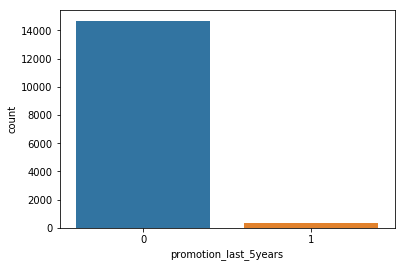

In [6]:
sns.countplot('promotion_last_5years',data=HRdata)

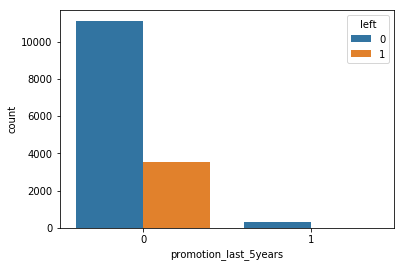

In [7]:
sns.countplot('promotion_last_5years',data=HRdata,hue='left')

In [8]:
employeeDepartmentWise = HRdata.sales.value_counts()
print employeeDepartmentWise
print employeeDepartmentWise.index

sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: sales, dtype: int64
Index([u'sales', u'technical', u'support', u'IT', u'product_mng', u'marketing',
       u'RandD', u'accounting', u'hr', u'management'],
      dtype='object')


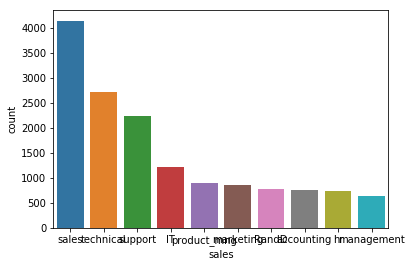

In [9]:
sns.countplot('sales',data=HRdata,order=employeeDepartmentWise.index)

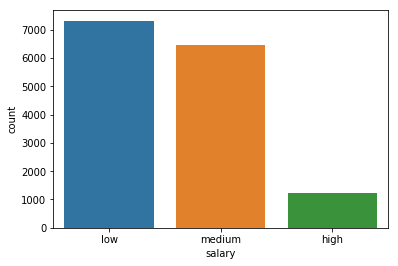

In [10]:
sns.countplot(HRdata.salary)

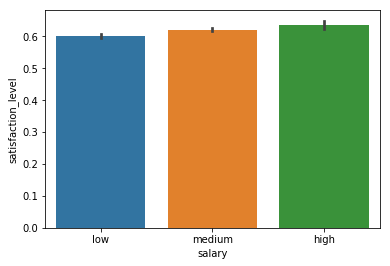

In [11]:
sns.barplot('salary','satisfaction_level',data=HRdata)

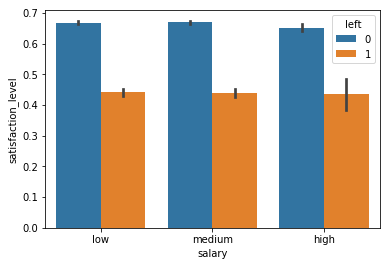

In [12]:
sns.barplot('salary','satisfaction_level',data=HRdata,hue='left')

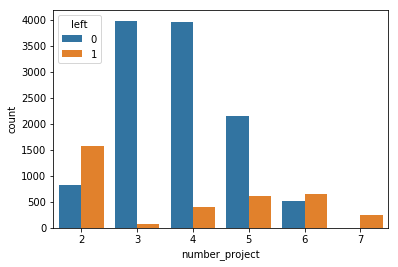

In [13]:
sns.countplot('number_project',data=HRdata,hue='left')

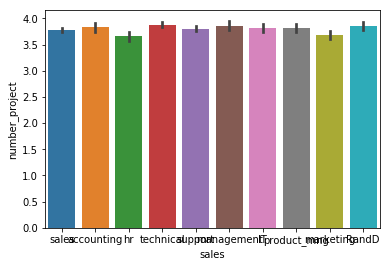

In [14]:
sns.barplot('sales','number_project',data=HRdata)

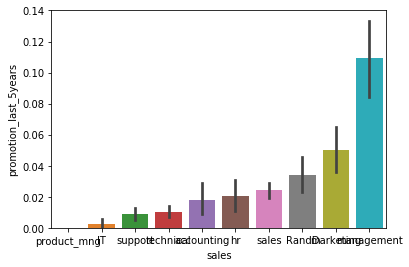

In [15]:
order = HRdata.groupby('sales').mean().sort_values(by='promotion_last_5years').index
sns.barplot(x=HRdata.sales, y=HRdata.promotion_last_5years, order=order)

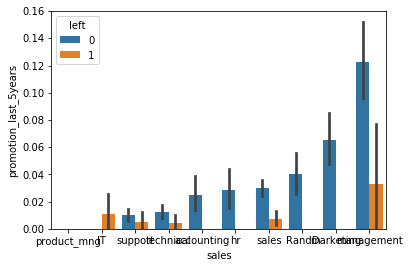

In [16]:
sns.barplot(x='sales', y='promotion_last_5years', data=HRdata, hue='left', order=order)

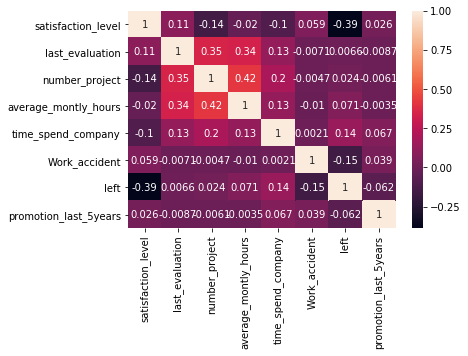

In [17]:
corr = HRdata.corr()
sns.heatmap(corr,annot=True)